In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#true_root = 14.7802
true_root = 14.8011359

## Bisection method
$$ x_r = \frac{x_u+x_l}{2}$$

In [3]:
#bisection method
bisection_method = lambda xl, xu : (xl+xu)/2

## Function to estimate : 
$$ f(x) = \frac{9.81\times68.1}{x}[1-{\rm e}^{-(x/68.1)10}]-40$$

In [4]:
#function to be estimated
func = lambda x: ((9.81*68.1)/x)*(1-np.exp(-(x/68.1)*10))-40

## Function to estimate (Case 2) : 
$$ f(x) = x^{10}-1$$

In [5]:
#function to be estimated (2)
func2 = lambda x: (x**10)-1

In [6]:
def bracketing_method(lower, upper, func, is_zero_digit=3, significant=3, max_iter=1000):
    """
    Parameter :
    - lower           = lower value for approximation
    - upper           = upper value for approximation
    - func            = function to be estimated
    - is_zero_digit   = true zero with respect < 10^-n digits
    - significant     = prefixed percent tolerance
    - max_iter        = max iteration algorithm

    Output :
    - root            = true root with respect <10^-n  digits (is_zero_digit)
    - xr              = root estimated
    - xr_array        = history when root estimating
    - ea_array        = history for error approximation
    - et_array        = history for true error approximation

    Algorithm Steps : 
    1. Choose two points xl and xu such that f(xl)*f(xr)<0
    2. Estimate the root xr using bisection method
    3. Determine which subinterval the root lies:
    """
    xl = lower
    xu = upper
    es = 0.5*10**(2-significant)
    xr = 0
    ea = 0
    et = 0
    xr_array = np.zeros(0)
    ea_array = np.zeros(0)
    ea_array = np.append(ea_array,"None")
    et_array = np.zeros(0)
    root = None
    
    if(func(xl)*func(xu)<0):
        for i in range(max_iter):
            xr = bisection_method(xl,xu)
            xr_array = np.append(xr_array,xr)
            
            if(func(xl)*func(xr) < 0):
                xu = xr
            if(func(xl)*func(xr) > 0):
                xl = xr
            if(np.abs(func(xl)*func(xr)) < (10**(-is_zero_digit))):
                root = xr
            #calculate ea
            et = ((true_root-xr)/(true_root))*100
            et_array = np.append(et_array,np.round(np.abs(et),6))
            #print(xr)
            if(i>0):
                ea = ((xr_array[i]-xr_array[i-1])/(xr_array[i]))*100
                ea_array = np.append(ea_array,np.round(np.abs(ea),6))
            
            if(np.abs(ea)<es) and (i>0):
                print("iteration break at index ",i)
                break
    else:
        print("xl and xu point not recommend to start iteration")

    return root, xr, xr_array, ea_array, et_array

In [7]:
root, xr, xr_array, ea_array, et_array = bracketing_method(1,20,func,6,6,10000)
print("estimated : {}".format(xr))
print("true root : {}".format(root))

#displaying data with Pandas
df = pd.DataFrame({"xr":xr_array,"f(xr)":func(xr_array),"ea":ea_array,"et":et_array})
display(df)

iteration break at index  21
estimated : 14.8011314868927
true root : 14.8011314868927


,xr,f(xr),ea,et
0,10.500000,1.001010e+01,None,29.059499
1,15.250000,-8.593929e-01,31.147541,3.032633
2,12.875000,4.054102e+00,18.446602,13.013433
3,14.062500,1.481727e+00,8.444444,4.990400
4,14.656250,2.838956e-01,4.051173,0.978884
5,14.953125,-2.943733e-01,1.985371,1.026875
6,14.804688,-6.918677e-03,1.002639,0.023995
7,14.730469,1.380655e-01,0.503845,0.477444
8,14.767578,6.546804e-02,0.25129,0.226724
9,14.786133,2.924839e-02,0.125487,0.101364


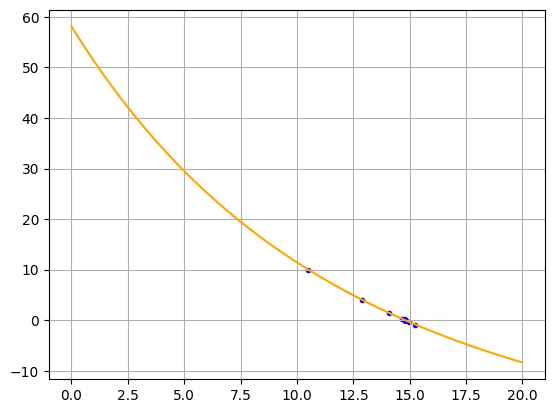

In [8]:
x = np.arange(0.001,20,0.001)
y = func(x)

plt.scatter(xr_array, func(xr_array), color = "blue", marker=".")
plt.plot(x, y, color = "orange")
plt.grid(True)


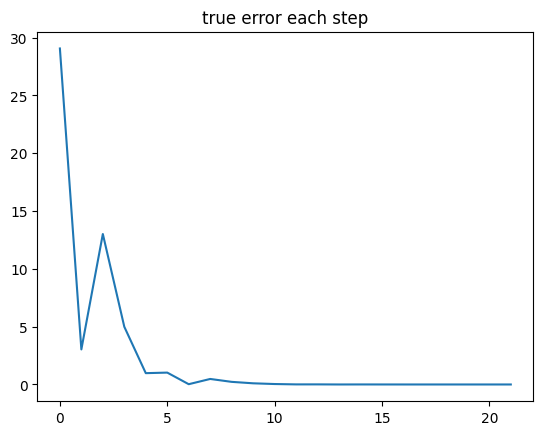

In [9]:
#true error plot
x = np.arange(0,len(et_array),1)
plt.title("true error each step")
plt.plot(x,et_array)

# Function Estimation (Case 2)

In [11]:
root, xr, xr_array, ea_array, et_array = bracketing_method(0.1,1.3,func2,6,6,10000)
print("estimated : {}".format(xr))
print("true root : {}".format(root))

#displaying data with Pandas
df = pd.DataFrame({"xr":xr_array,"f(xr)":func(xr_array),"ea":ea_array,"et":et_array})
display(df)

iteration break at index  2
estimated : 1.0
true root : 1.0


,xr,f(xr),ea,et
0,0.7,53.226551,None,95.270633
1,1.0,51.237338,30.0,93.243762
2,1.0,51.237338,0.0,93.243762


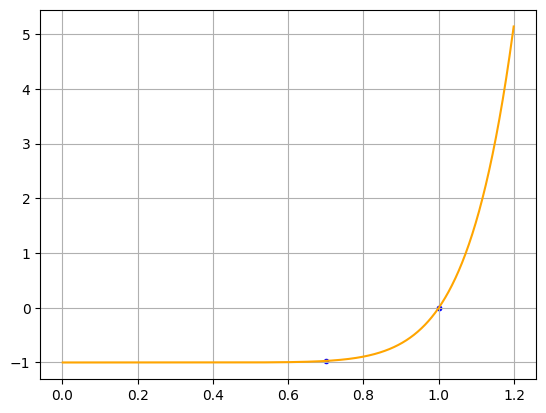

In [12]:
x = np.arange(0.001,1.2,0.001)
y = func2(x)

plt.scatter(xr_array, func2(xr_array), color = "blue", marker=".")
plt.plot(x, y, color = "orange")
plt.grid(True)

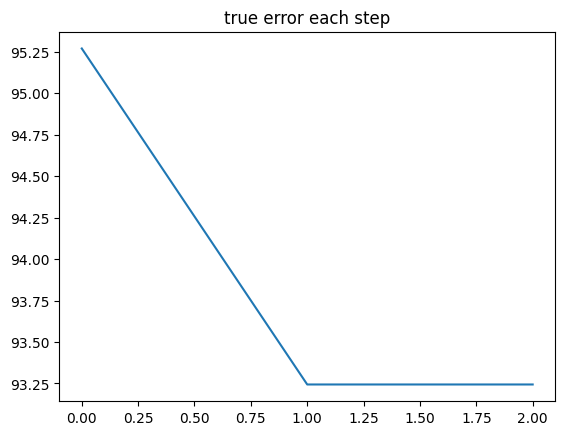

In [13]:
#true error plot
x = np.arange(0,len(et_array),1)
plt.title("true error each step")
plt.plot(x,et_array)